In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [3]:
df = pd.read_csv('C:\\Users\\Admin\\Documents\\AITU Courses\\Course 3\\Diploma work\\datasets\\electricity.csv')
df.head()

,timestamp,Panther_parking_Lorriane,Panther_lodging_Cora,Panther_office_Hannah,Panther_lodging_Hattie,Panther_education_Teofila,Panther_education_Jerome,Panther_retail_Felix,Panther_parking_Asia,Panther_education_Misty,...,Cockatoo_public_Caleb,Cockatoo_education_Tyler,Cockatoo_public_Shad,Mouse_health_Buddy,Mouse_health_Modesto,Mouse_lodging_Vicente,Mouse_health_Justin,Mouse_health_Ileana,Mouse_health_Estela,Mouse_science_Micheal
0,2016-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,123.200,727.575,69.200,8.8224,370.0870,10.0,282.9965,26.0,135.0,168.2243
1,2016-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,126.475,731.200,66.275,17.6449,737.8260,30.0,574.9265,51.0,265.0,336.4486
2,2016-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,127.825,724.675,64.675,17.6449,729.9255,30.0,570.2780,50.0,272.0,336.4486
3,2016-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,130.475,737.375,65.875,17.6449,722.2620,20.0,561.1470,52.0,276.0,336.4486
4,2016-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,129.675,721.150,66.275,17.6449,719.1665,30.0,564.3695,50.0,280.0,336.4486


In [4]:
dfw = pd.read_csv('C:\\Users\\Admin\\Documents\\AITU Courses\\Course 3\\Diploma work\\datasets\\weatherstats_ottawa_hourly.csv')
dfw

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,date_time_local,unixtime,pressure_station,pressure_sea,wind_dir,wind_dir_10s,wind_speed,wind_gust,relative_humidity,dew_point,...,windchill,humidex,visibility,health_index,cloud_cover_4,cloud_cover_8,cloud_cover_10,solar_radiation,max_air_temp_pst1hr,min_air_temp_pst1hr
0,2023-04-20 07:00:00 EDT,1681988400,101.10,102.54,NNW,34.0,13,NaN,59.0,-6.6,...,NaN,NaN,24100.0,NaN,NaN,2.0,NaN,108.0,0.7,0.3
1,2023-04-20 06:00:00 EDT,1681984800,101.07,102.51,NNW,34.0,17,NaN,65.0,-5.2,...,NaN,NaN,24100.0,2.3,NaN,6.0,NaN,NaN,1.8,0.6
2,2023-04-20 05:00:00 EDT,1681981200,101.01,102.44,NW,32.0,13,NaN,65.0,-4.1,...,NaN,NaN,24100.0,2.3,NaN,8.0,NaN,NaN,1.9,1.7
3,2023-04-20 04:00:00 EDT,1681977600,100.99,102.42,NW,31.0,12,NaN,67.0,-3.7,...,NaN,NaN,24100.0,2.3,NaN,8.0,NaN,NaN,2.0,1.6
4,2023-04-20 03:00:00 EDT,1681974000,100.95,102.38,WNW,28.0,7,NaN,69.0,-3.4,...,NaN,NaN,24100.0,2.3,NaN,8.0,NaN,NaN,1.7,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2011-11-22 19:00:00 EST,1322006400,101.12,102.58,NaN,7.0,19,NaN,61.0,-8.2,...,-7.0,NaN,24100.0,2.1,NaN,NaN,NaN,NaN,NaN,NaN
99996,2011-11-22 18:00:00 EST,1322002800,101.22,102.68,NaN,6.0,15,NaN,59.0,-8.5,...,-6.0,NaN,24100.0,2.1,NaN,NaN,NaN,NaN,NaN,NaN
99997,2011-11-22 17:00:00 EST,1321999200,101.30,102.76,NaN,6.0,17,NaN,56.0,-8.9,...,-6.0,NaN,24100.0,2.1,NaN,NaN,NaN,NaN,NaN,NaN
99998,2011-11-22 16:00:00 EST,1321995600,101.40,102.86,NaN,7.0,9,NaN,52.0,-9.5,...,-4.0,NaN,24100.0,2.1,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dfw.columns

Index(['date_time_local', 'unixtime', 'pressure_station', 'pressure_sea',
       'wind_dir', 'wind_dir_10s', 'wind_speed', 'wind_gust',
       'relative_humidity', 'dew_point', 'temperature', 'windchill', 'humidex',
       'visibility', 'health_index', 'cloud_cover_4', 'cloud_cover_8',
       'cloud_cover_10', 'solar_radiation', 'max_air_temp_pst1hr',
       'min_air_temp_pst1hr'],
      dtype='object')

In [6]:
dfw = dfw[['date_time_local', 'wind_dir_10s', 'dew_point', 'visibility', 'relative_humidity', 'wind_speed', 'temperature']]

In [7]:
dfw['date_time_local'] = dfw['date_time_local'].str.replace(' EDT', '')
dfw['date_time_local'] = dfw['date_time_local'].str.replace(' EST', '')
dfw = dfw[(dfw['date_time_local'] >= '2016-01-01 00:00:00') & (dfw['date_time_local'] < '2018-01-01 00:00:00')]
dfw.date_time_local = pd.to_datetime(dfw.date_time_local)
dfw = dfw.set_index('date_time_local')
dfw.sort_index(inplace=True)
dfw

<ipython-input-7-4b41f5f4d313>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfw['date_time_local'] = dfw['date_time_local'].str.replace(' EDT', '')
<ipython-input-7-4b41f5f4d313>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfw['date_time_local'] = dfw['date_time_local'].str.replace(' EST', '')


,wind_dir_10s,dew_point,visibility,relative_humidity,wind_speed,temperature
date_time_local,,,,,,
2016-01-01 00:00:00,26.0,-3.8,24100.0,91.0,10,-2.5
2016-01-01 01:00:00,25.0,-4.1,6400.0,90.0,10,-2.7
2016-01-01 02:00:00,25.0,-4.3,4800.0,92.0,6,-3.2
2016-01-01 03:00:00,26.0,-4.2,4800.0,94.0,5,-3.4
2016-01-01 04:00:00,22.0,-4.5,6400.0,95.0,6,-3.8
...,...,...,...,...,...,...
2017-12-31 19:00:00,28.0,-26.9,24100.0,61.0,18,-21.4
2017-12-31 20:00:00,28.0,-27.1,24100.0,63.0,13,-21.9
2017-12-31 21:00:00,28.0,-26.8,24100.0,65.0,14,-21.9


In [8]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17544 entries, 2016-01-01 00:00:00 to 2017-12-31 23:00:00
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   wind_dir_10s       17544 non-null  float64
 1   dew_point          17544 non-null  float64
 2   visibility         17541 non-null  float64
 3   relative_humidity  17544 non-null  float64
 4   wind_speed         17544 non-null  int64  
 5   temperature        17544 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 959.4 KB


In [9]:
dfw.visibility = dfw['visibility'].interpolate(option='spline')

In [10]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17544 entries, 2016-01-01 00:00:00 to 2017-12-31 23:00:00
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   wind_dir_10s       17544 non-null  float64
 1   dew_point          17544 non-null  float64
 2   visibility         17544 non-null  float64
 3   relative_humidity  17544 non-null  float64
 4   wind_speed         17544 non-null  int64  
 5   temperature        17544 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 959.4 KB


In [11]:
df = df [['timestamp', 'Moose_education_Ricardo']]
df.rename(columns={'Moose_education_Ricardo': 'electricity'}, inplace=True)

df.timestamp = pd.to_datetime(df.timestamp)
df = df.set_index('timestamp')
df.sort_index(inplace=True)
df

,electricity
timestamp,
2016-01-01 00:00:00,255.3613
2016-01-01 01:00:00,256.8002
2016-01-01 02:00:00,259.6808
2016-01-01 03:00:00,261.1197
2016-01-01 04:00:00,268.3197
...,...
2017-12-31 19:00:00,337.4392
2017-12-31 20:00:00,340.8003
2017-12-31 21:00:00,336.0003


In [12]:
dfw.reset_index(inplace=True)
df.reset_index(inplace=True)

In [13]:
dfw

,date_time_local,wind_dir_10s,dew_point,visibility,relative_humidity,wind_speed,temperature
0,2016-01-01 00:00:00,26.0,-3.8,24100.0,91.0,10,-2.5
1,2016-01-01 01:00:00,25.0,-4.1,6400.0,90.0,10,-2.7
2,2016-01-01 02:00:00,25.0,-4.3,4800.0,92.0,6,-3.2
3,2016-01-01 03:00:00,26.0,-4.2,4800.0,94.0,5,-3.4
4,2016-01-01 04:00:00,22.0,-4.5,6400.0,95.0,6,-3.8
...,...,...,...,...,...,...,...
17539,2017-12-31 19:00:00,28.0,-26.9,24100.0,61.0,18,-21.4
17540,2017-12-31 20:00:00,28.0,-27.1,24100.0,63.0,13,-21.9
17541,2017-12-31 21:00:00,28.0,-26.8,24100.0,65.0,14,-21.9
17542,2017-12-31 22:00:00,27.0,-27.3,24100.0,70.0,8,-23.2


In [14]:
df2 = pd.merge(df, dfw, how='inner', left_on = 'timestamp', right_on = 'date_time_local')
df2

,timestamp,electricity,date_time_local,wind_dir_10s,dew_point,visibility,relative_humidity,wind_speed,temperature
0,2016-01-01 00:00:00,255.3613,2016-01-01 00:00:00,26.0,-3.8,24100.0,91.0,10,-2.5
1,2016-01-01 01:00:00,256.8002,2016-01-01 01:00:00,25.0,-4.1,6400.0,90.0,10,-2.7
2,2016-01-01 02:00:00,259.6808,2016-01-01 02:00:00,25.0,-4.3,4800.0,92.0,6,-3.2
3,2016-01-01 03:00:00,261.1197,2016-01-01 03:00:00,26.0,-4.2,4800.0,94.0,5,-3.4
4,2016-01-01 04:00:00,268.3197,2016-01-01 04:00:00,22.0,-4.5,6400.0,95.0,6,-3.8
...,...,...,...,...,...,...,...,...,...
17539,2017-12-31 19:00:00,337.4392,2017-12-31 19:00:00,28.0,-26.9,24100.0,61.0,18,-21.4
17540,2017-12-31 20:00:00,340.8003,2017-12-31 20:00:00,28.0,-27.1,24100.0,63.0,13,-21.9
17541,2017-12-31 21:00:00,336.0003,2017-12-31 21:00:00,28.0,-26.8,24100.0,65.0,14,-21.9
17542,2017-12-31 22:00:00,336.0003,2017-12-31 22:00:00,27.0,-27.3,24100.0,70.0,8,-23.2


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17544 entries, 0 to 17543
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   timestamp          17544 non-null  datetime64[ns]
 1   electricity        17544 non-null  float64       
 2   date_time_local    17544 non-null  datetime64[ns]
 3   wind_dir_10s       17544 non-null  float64       
 4   dew_point          17544 non-null  float64       
 5   visibility         17544 non-null  float64       
 6   relative_humidity  17544 non-null  float64       
 7   wind_speed         17544 non-null  int64         
 8   temperature        17544 non-null  float64       
dtypes: datetime64[ns](2), float64(6), int64(1)
memory usage: 1.3 MB


In [16]:
df2.isnull().sum()

timestamp            0
electricity          0
date_time_local      0
wind_dir_10s         0
dew_point            0
visibility           0
relative_humidity    0
wind_speed           0
temperature          0
dtype: int64

In [17]:
df2.set_index('timestamp', inplace = True)
df2.drop('date_time_local', axis=1, inplace = True)

In [18]:
df2

,electricity,wind_dir_10s,dew_point,visibility,relative_humidity,wind_speed,temperature
timestamp,,,,,,,
2016-01-01 00:00:00,255.3613,26.0,-3.8,24100.0,91.0,10,-2.5
2016-01-01 01:00:00,256.8002,25.0,-4.1,6400.0,90.0,10,-2.7
2016-01-01 02:00:00,259.6808,25.0,-4.3,4800.0,92.0,6,-3.2
2016-01-01 03:00:00,261.1197,26.0,-4.2,4800.0,94.0,5,-3.4
2016-01-01 04:00:00,268.3197,22.0,-4.5,6400.0,95.0,6,-3.8
...,...,...,...,...,...,...,...
2017-12-31 19:00:00,337.4392,28.0,-26.9,24100.0,61.0,18,-21.4
2017-12-31 20:00:00,340.8003,28.0,-27.1,24100.0,63.0,13,-21.9
2017-12-31 21:00:00,336.0003,28.0,-26.8,24100.0,65.0,14,-21.9


## Feature engineering

In [19]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    df['weekofyear'] = df['weekofyear'].astype(int)
    return df

df = create_features(df2)

In [20]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Extract month from the 'Timestamp' column and map it to seasons
df['season'] = df.month.map(get_season)

In [21]:
df = pd.get_dummies (df, columns=['season'], drop_first= True )

In [22]:
df['hourxdayofweek'] = df.hour * df.dayofweek

In [23]:
df

,electricity,wind_dir_10s,dew_point,visibility,relative_humidity,wind_speed,temperature,hour,dayofweek,quarter,month,dayofyear,dayofmonth,weekofyear,season_Spring,season_Summer,season_Winter,hourxdayofweek
timestamp,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,255.3613,26.0,-3.8,24100.0,91.0,10,-2.5,0,4,1,1,1,1,53,0,0,1,0
2016-01-01 01:00:00,256.8002,25.0,-4.1,6400.0,90.0,10,-2.7,1,4,1,1,1,1,53,0,0,1,4
2016-01-01 02:00:00,259.6808,25.0,-4.3,4800.0,92.0,6,-3.2,2,4,1,1,1,1,53,0,0,1,8
2016-01-01 03:00:00,261.1197,26.0,-4.2,4800.0,94.0,5,-3.4,3,4,1,1,1,1,53,0,0,1,12
2016-01-01 04:00:00,268.3197,22.0,-4.5,6400.0,95.0,6,-3.8,4,4,1,1,1,1,53,0,0,1,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 19:00:00,337.4392,28.0,-26.9,24100.0,61.0,18,-21.4,19,6,4,12,365,31,52,0,0,1,114
2017-12-31 20:00:00,340.8003,28.0,-27.1,24100.0,63.0,13,-21.9,20,6,4,12,365,31,52,0,0,1,120
2017-12-31 21:00:00,336.0003,28.0,-26.8,24100.0,65.0,14,-21.9,21,6,4,12,365,31,52,0,0,1,126


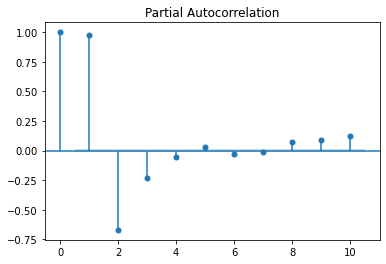

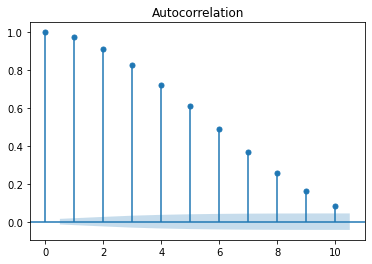

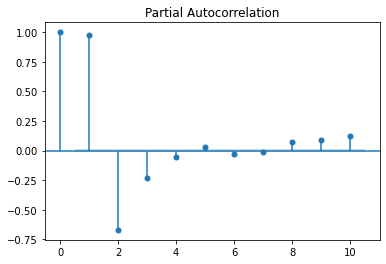

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['electricity'], lags=10)
plot_pacf(df['electricity'], lags=10)

In [25]:
# df['lag_1'] = df['electricity'].shift(1)
# df.dropna(inplace=True)
# df

In [26]:
import holidays
df['hols'] = pd.Series(df.index).apply(lambda x: holidays.Canada(years = [2016,2017]).get(x)).values

In [27]:
df3 = df.copy(deep=True)

In [28]:
df['hols'] = df['hols'].notnull().astype('int')

In [29]:
df[['electricity','hour', 'dayofweek', 'quarter', 'month', 'dayofyear', 'dayofmonth', 'weekofyear', 'hols','season_Summer'
   ,'season_Winter', 'season_Spring']]

,electricity,hour,dayofweek,quarter,month,dayofyear,dayofmonth,weekofyear,hols,season_Summer,season_Winter,season_Spring
timestamp,,,,,,,,,,,,
2016-01-01 00:00:00,255.3613,0,4,1,1,1,1,53,1,0,1,0
2016-01-01 01:00:00,256.8002,1,4,1,1,1,1,53,1,0,1,0
2016-01-01 02:00:00,259.6808,2,4,1,1,1,1,53,1,0,1,0
2016-01-01 03:00:00,261.1197,3,4,1,1,1,1,53,1,0,1,0
2016-01-01 04:00:00,268.3197,4,4,1,1,1,1,53,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 19:00:00,337.4392,19,6,4,12,365,31,52,0,0,1,0
2017-12-31 20:00:00,340.8003,20,6,4,12,365,31,52,0,0,1,0
2017-12-31 21:00:00,336.0003,21,6,4,12,365,31,52,0,0,1,0


## Data description

In [30]:
df.describe()['electricity']

count    17544.000000
mean       308.887009
std         57.754395
min        202.080700
25%        262.080800
50%        300.000200
75%        350.880800
max        462.239300
Name: electricity, dtype: float64

In [31]:
df

,electricity,wind_dir_10s,dew_point,visibility,relative_humidity,wind_speed,temperature,hour,dayofweek,quarter,month,dayofyear,dayofmonth,weekofyear,season_Spring,season_Summer,season_Winter,hourxdayofweek,hols
timestamp,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,255.3613,26.0,-3.8,24100.0,91.0,10,-2.5,0,4,1,1,1,1,53,0,0,1,0,1
2016-01-01 01:00:00,256.8002,25.0,-4.1,6400.0,90.0,10,-2.7,1,4,1,1,1,1,53,0,0,1,4,1
2016-01-01 02:00:00,259.6808,25.0,-4.3,4800.0,92.0,6,-3.2,2,4,1,1,1,1,53,0,0,1,8,1
2016-01-01 03:00:00,261.1197,26.0,-4.2,4800.0,94.0,5,-3.4,3,4,1,1,1,1,53,0,0,1,12,1
2016-01-01 04:00:00,268.3197,22.0,-4.5,6400.0,95.0,6,-3.8,4,4,1,1,1,1,53,0,0,1,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 19:00:00,337.4392,28.0,-26.9,24100.0,61.0,18,-21.4,19,6,4,12,365,31,52,0,0,1,114,0
2017-12-31 20:00:00,340.8003,28.0,-27.1,24100.0,63.0,13,-21.9,20,6,4,12,365,31,52,0,0,1,120,0
2017-12-31 21:00:00,336.0003,28.0,-26.8,24100.0,65.0,14,-21.9,21,6,4,12,365,31,52,0,0,1,126,0


In [32]:
day = df.copy(deep=True)
day['year'] = day.index.year
day['date'] = day['year'].map(str)+ '-' +day['month'].map(str) + '-' + day['dayofmonth'].map(str)
day['date'] = pd.to_datetime(day['date'], format='%Y-%m-%d').dt.strftime('%Y-%m-%d')

In [33]:
day[['electricity','date']].groupby(by=["date"]).sum().describe()['electricity']

count     731.000000
mean     7413.288217
std       974.018593
min      5093.290300
25%      6832.329150
50%      7423.678100
75%      8195.528750
max      9438.249100
Name: electricity, dtype: float64

In [34]:
df.electricity

timestamp
2016-01-01 00:00:00    255.3613
2016-01-01 01:00:00    256.8002
2016-01-01 02:00:00    259.6808
2016-01-01 03:00:00    261.1197
2016-01-01 04:00:00    268.3197
                         ...   
2017-12-31 19:00:00    337.4392
2017-12-31 20:00:00    340.8003
2017-12-31 21:00:00    336.0003
2017-12-31 22:00:00    336.0003
2017-12-31 23:00:00    333.1197
Name: electricity, Length: 17544, dtype: float64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17544 entries, 2016-01-01 00:00:00 to 2017-12-31 23:00:00
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   electricity        17544 non-null  float64
 1   wind_dir_10s       17544 non-null  float64
 2   dew_point          17544 non-null  float64
 3   visibility         17544 non-null  float64
 4   relative_humidity  17544 non-null  float64
 5   wind_speed         17544 non-null  int64  
 6   temperature        17544 non-null  float64
 7   hour               17544 non-null  int64  
 8   dayofweek          17544 non-null  int64  
 9   quarter            17544 non-null  int64  
 10  month              17544 non-null  int64  
 11  dayofyear          17544 non-null  int64  
 12  dayofmonth         17544 non-null  int64  
 13  weekofyear         17544 non-null  int32  
 14  season_Spring      17544 non-null  uint8  
 15  season_Summer      17544 non-null  

In [36]:
# how electricity statistics changes over time 

## Visualizations

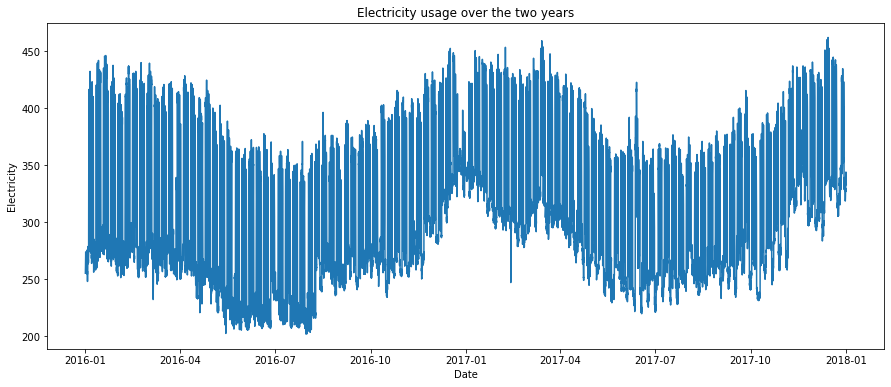

In [37]:
fig, ax = plt.subplots(figsize=(15, 6))
plt.plot(df.index, df.electricity)
plt.title('Electricity usage over the two years')
plt.xlabel('Date')
plt.ylabel('Electricity')
plt.savefig('Electricity 2016 and 2017.jpg', bbox_inches='tight')
plt.show()

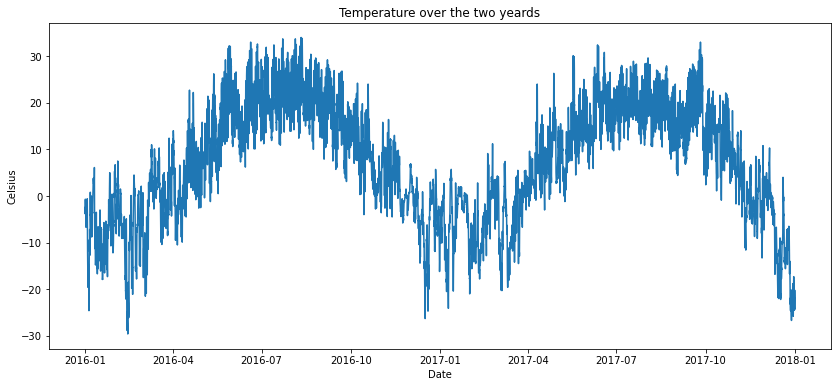

In [38]:
fig, ax = plt.subplots(figsize=(14, 6))
plt.plot(df.index, df.temperature)
plt.title('Temperature over the two yeards')
plt.xlabel('Date')
plt.ylabel('Celsius')
plt.show()

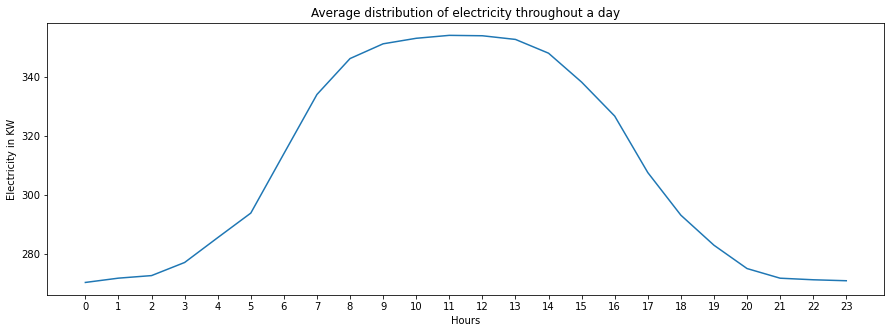

In [39]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(df.groupby(by=["hour"]).mean().index, df.groupby(by=["hour"]).mean().electricity)
plt.title('Average distribution of electricity throughout a day')
plt.xlabel('Hours')
plt.ylabel('Electricity in KW')
plt.xticks(df.groupby(by=["hour"]).mean().index)
plt.savefig('C:/Users/Admin/Documents/AITU Courses/Course 3/Diploma work/images for documentation/Average distribution of electricity throughout a day.jpg', bbox_inches='tight')
plt.show()

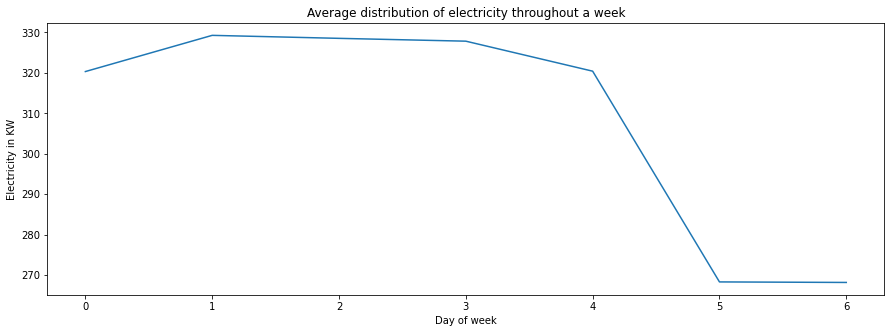

In [40]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(df.groupby(by=["dayofweek"]).mean().index, df.groupby(by=["dayofweek"]).mean().electricity)
plt.title('Average distribution of electricity throughout a week')
plt.xlabel('Day of week')
plt.ylabel('Electricity in KW')
plt.savefig('C:/Users/Admin/Documents/AITU Courses/Course 3/Diploma work/images for documentation/Average distribution of electricity throughout a week.jpg', bbox_inches='tight')
plt.show()

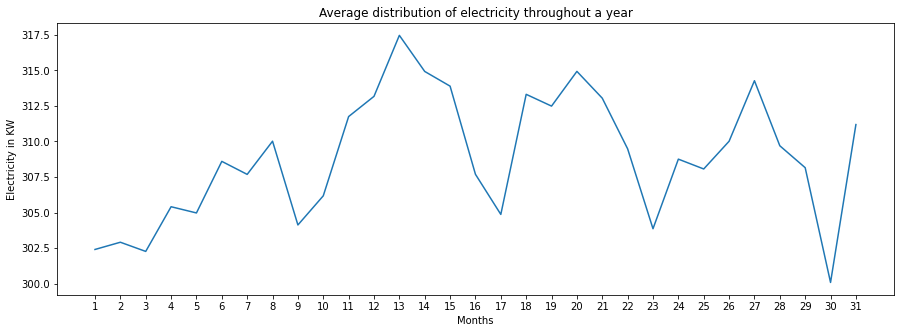

In [41]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(df.groupby(by=["dayofmonth"]).mean().index, df.groupby(by=["dayofmonth"]).mean().electricity)
plt.title('Average distribution of electricity throughout a year')
plt.xlabel('Months')
plt.ylabel('Electricity in KW')
plt.xticks(df.groupby(by=["dayofmonth"]).mean().index)
plt.savefig('Average distribution of electricity throughout a year.jpg', bbox_inches='tight')
plt.show()

In [42]:
df.groupby(by=["hols"]).sum().index.map({0: 'No_hol', 1: 'Yes_hol'})

Index(['No_hol', 'Yes_hol'], dtype='object', name='hols')

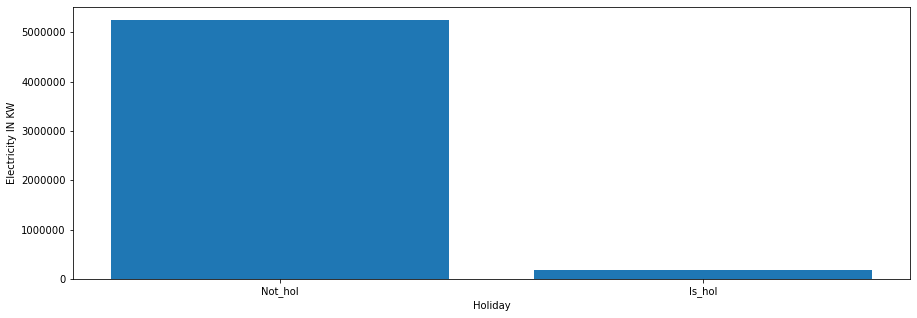

In [43]:
fig = plt.figure(figsize = (15, 5))

plt.ticklabel_format(axis="y", style='plain')

plt.bar(df.groupby(by=["hols"]).sum().index.map({0: 'Not_hol', 1: 'Is_hol'}), df.groupby(by=["hols"]).sum()['electricity'])
plt.xlabel('Holiday')
plt.ylabel('Electricity IN KW')
plt.savefig('Bar char electricity and holiday.jpg', bbox_inches='tight')
plt.show()

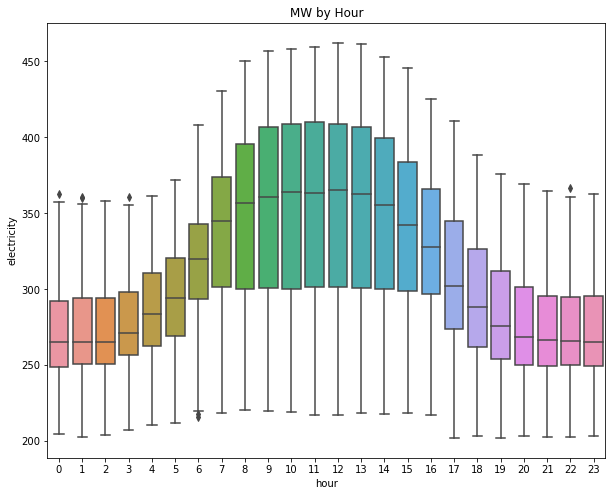

In [44]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='hour', y='electricity')
ax.set_title('MW by Hour')
plt.show()

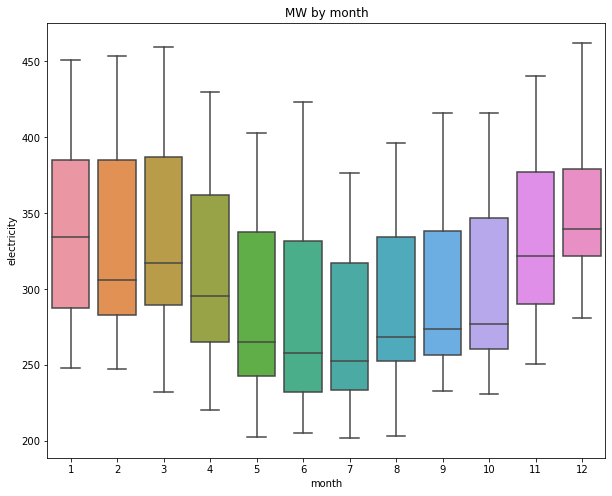

In [45]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='electricity')
ax.set_title('MW by month')
plt.show()

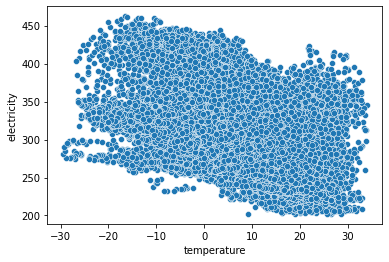

In [46]:
sns.scatterplot(x="temperature", y="electricity", data=df);

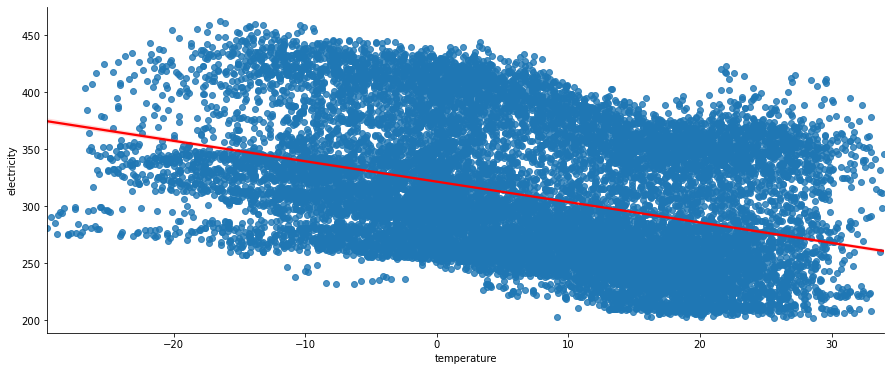

In [47]:
sns.regplot(x='temperature', y='electricity', data=df, line_kws={'color': 'red'}).figure.set_size_inches(15, 6)
sns.despine()

In [48]:
df.corr()

,electricity,wind_dir_10s,dew_point,visibility,relative_humidity,wind_speed,temperature,hour,dayofweek,quarter,month,dayofyear,dayofmonth,weekofyear,season_Spring,season_Summer,season_Winter,hourxdayofweek,hols
electricity,1.000000,-0.021452,-0.388802,-0.120172,-0.028393,0.169717,-0.380869,-0.015980,-0.355113,-0.050474,-0.033513,-0.030932,0.021360,-0.031665,0.008566,-0.306511,0.308204,-0.252265,-0.064566
wind_dir_10s,-0.021452,1.000000,-0.051499,0.213628,-0.173342,0.142481,0.005236,0.030794,0.038928,0.010704,0.018714,0.019221,0.006880,0.025300,-0.026368,0.061102,-0.033262,0.043643,-0.007200
dew_point,-0.388802,-0.051499,1.000000,0.044549,0.186983,-0.166040,0.930153,0.021221,-0.014441,0.290614,0.269224,0.267315,0.010086,0.254297,-0.173140,0.588371,-0.595848,0.000091,-0.024272
visibility,-0.120172,0.213628,0.044549,1.000000,-0.478960,-0.074398,0.196022,0.043212,0.007802,0.079185,0.077198,0.076782,0.005018,0.062882,-0.010427,0.161098,-0.175030,0.032133,-0.016562
relative_humidity,-0.028393,-0.173342,0.186983,-0.478960,1.000000,-0.163967,-0.179218,-0.285305,0.001412,0.111303,0.102003,0.099111,-0.034518,0.110013,-0.223175,-0.049358,0.137977,-0.171038,0.014663
wind_speed,0.169717,0.142481,-0.166040,-0.074398,-0.163967,1.000000,-0.111998,0.082510,-0.015825,-0.076377,-0.076362,-0.074808,0.012663,-0.069326,0.081211,-0.108356,0.093575,0.046592,-0.015291
temperature,-0.380869,0.005236,0.930153,0.196022,-0.179218,-0.111998,1.000000,0.125408,-0.015350,0.245084,0.226005,0.225400,0.025156,0.208560,-0.082040,0.602577,-0.646267,0.062246,-0.027487
hour,-0.015980,0.030794,0.021221,0.043212,-0.285305,0.082510,0.125408,1.000000,-0.000025,-0.000442,-0.000384,-0.000373,0.000144,-0.000372,0.000370,0.000010,0.000009,0.612798,0.000003
dayofweek,-0.355113,0.038928,-0.014441,0.007802,0.001412,-0.015825,-0.015350,-0.000025,1.000000,0.007773,0.005525,0.005105,-0.004673,0.007568,-0.007500,-0.003955,0.013488,0.677019,-0.151264
quarter,-0.050474,0.010704,0.290614,0.079185,0.111303,-0.076377,0.245084,-0.000442,0.007773,1.000000,0.971433,0.968235,0.010604,0.942274,-0.438216,0.086187,-0.246554,0.004723,0.008780


In [49]:
df.corr()['electricity'].sort_values()

dew_point           -0.388802
temperature         -0.380869
dayofweek           -0.355113
season_Summer       -0.306511
hourxdayofweek      -0.252265
visibility          -0.120172
hols                -0.064566
quarter             -0.050474
month               -0.033513
weekofyear          -0.031665
dayofyear           -0.030932
relative_humidity   -0.028393
wind_dir_10s        -0.021452
hour                -0.015980
season_Spring        0.008566
dayofmonth           0.021360
wind_speed           0.169717
season_Winter        0.308204
electricity          1.000000
Name: electricity, dtype: float64

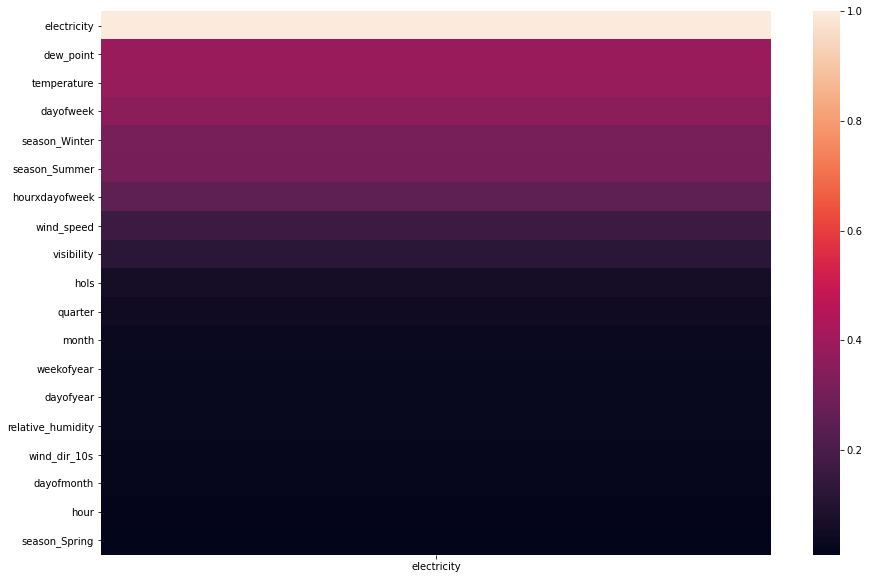

In [50]:
corr = abs(df.corr())
snsheat_plot = sns.heatmap(corr[['electricity']].sort_values(by=['electricity'],ascending=False)).figure.set_size_inches(15, 10)

In [51]:
vis = df.copy(deep=True)
vis['year'] = vis.index.year
vis['date'] = vis['year'].map(str)+ '-' +vis['month'].map(str)
vis['date'] = pd.to_datetime(vis['date'], format='%Y-%m').dt.strftime('%Y-%m')

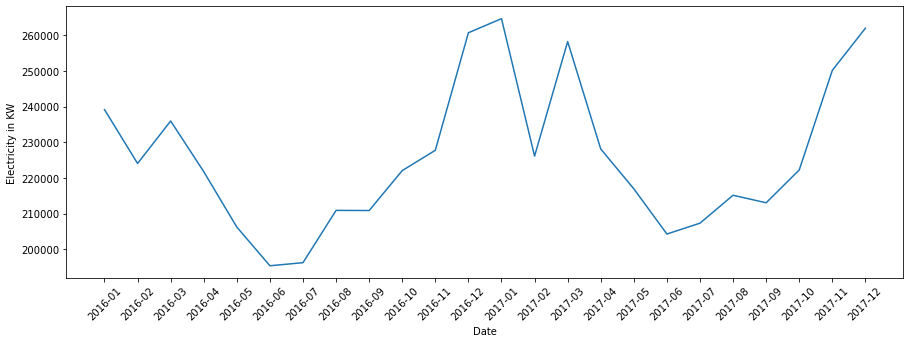

In [52]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(vis[['electricity','date']].groupby(by=["date"]).sum().index, vis[['electricity','date']].groupby(by=["date"]).sum().electricity)
plt.xlabel('Date')
plt.ylabel('Electricity in KW')
plt.xticks(rotation=45)
plt.show()


In [53]:
percentile_05 = df['electricity'].quantile(0.05)
percentile_95 = df['electricity'].quantile(0.95)

lower_outliers = df[df['electricity'] < percentile_05]
higher_outliers = df[df['electricity'] > percentile_95]

lower_outliers_count = len(lower_outliers)
higher_outliers_count = len(higher_outliers)

print("Number of outliers below 0.05 percentile:", lower_outliers_count)
print("Number of outliers above 0.95 percentile:", higher_outliers_count)

Number of outliers below 0.05 percentile: 862
Number of outliers above 0.95 percentile: 877


In [54]:
df_before = df.copy(deep=True)

In [55]:
from scipy.stats.mstats import winsorize

# Assuming your DataFrame is called 'df' and the column with outliers is 'non_cumulative_consumption'

# Winsorize 'non_cumulative_consumption' column to replace outliers with trimmed values
df['electricity'] = winsorize(df['electricity'], limits=[0.05, 0.05])

## Forecasting

### XGBRegressor

In [56]:
X = df.drop(labels=['electricity'], axis=1)
y = df['electricity']

In [57]:
X_train = X[(X.index >= '2016-01-01 00:00') & (X.index < '2017-01-01 00:00')]
X_test = X[(X.index >= '2017-01-01 00:00') & (X.index < '2018-01-01 00:00')]
y_train = y[(y.index >= '2016-01-01 00:00') & (y.index < '2017-01-01 00:00')]
y_test = y[(y.index >= '2017-01-01 00:00') & (y.index < '2018-01-01 00:00')]

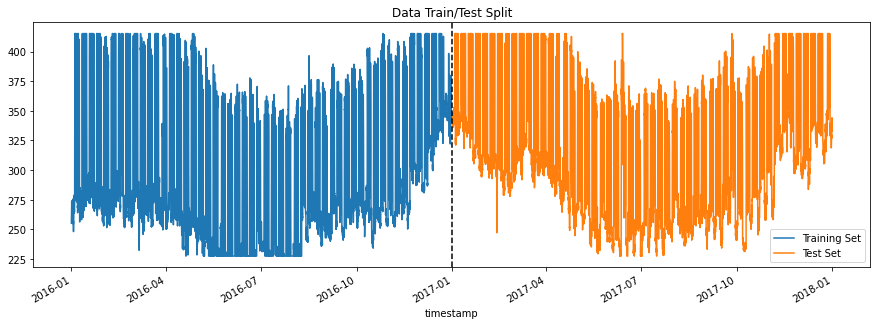

In [58]:
fig, ax = plt.subplots(figsize=(15, 5))
y_train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
y_test.plot(ax=ax, label='Test Set')
ax.axvline(y_test.index[0], color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])

plt.savefig('C:/Users/Admin/Documents/AITU Courses/Course 3/Diploma work/images for documentation/Train test split electricity.jpg', bbox_inches='tight')

plt.show()

In [59]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2016-01-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   wind_dir_10s       8784 non-null   float64
 1   dew_point          8784 non-null   float64
 2   visibility         8784 non-null   float64
 3   relative_humidity  8784 non-null   float64
 4   wind_speed         8784 non-null   int64  
 5   temperature        8784 non-null   float64
 6   hour               8784 non-null   int64  
 7   dayofweek          8784 non-null   int64  
 8   quarter            8784 non-null   int64  
 9   month              8784 non-null   int64  
 10  dayofyear          8784 non-null   int64  
 11  dayofmonth         8784 non-null   int64  
 12  weekofyear         8784 non-null   int32  
 13  season_Spring      8784 non-null   uint8  
 14  season_Summer      8784 non-null   uint8  
 15  season_Winter      8784 non-null   u

In [60]:
reg = xgb.XGBRegressor()
reg.fit(X_train, y_train)

mse_reg = mean_squared_error(y_test, reg.predict(X_test))
r2_reg = r2_score(y_test, reg.predict(X_test))
mae_reg = mean_absolute_error (y_test, reg.predict(X_test))

print(f'MSE Score on Test set: {mse_reg:0.2f}')
print(f'RMSE Score on Test set: {np.sqrt(mse_reg):0.2f}')
print(f'R2 Score on Test set: {r2_reg:0.2f}')
print(f'MAE Score on Test set: {mae_reg:0.2f}')

MSE Score on Test set: 643.93
RMSE Score on Test set: 25.38
R2 Score on Test set: 0.78
MAE Score on Test set: 18.94


In [61]:
# from sklearn.model_selection import GridSearchCV

# reg2 = xgb.XGBRegressor()

# param_grid = { 
#     'max_depth' : [5,6,7],
#     'n_estimators' : [100, 200],
#     'learning_rate' : [0.01,0.1],
#     'min_child_weight' : [20,30,40],
  
# }

# reg2 = GridSearchCV(estimator=reg2, param_grid=param_grid)

# reg2.fit(X_train, y_train)

# reg2.best_params_

In [62]:
reg3 = xgb.XGBRegressor(min_child_weight = 40,
                        learning_rate = 0.1,
                        max_depth = 5, n_estimators = 100)
reg3.fit(X_train, y_train)

mse_reg3 = mean_squared_error(y_test, reg3.predict(X_test))

r2_reg3 = r2_score(y_test, reg3.predict(X_test))

mae_reg3 = mean_absolute_error (y_test, reg3.predict(X_test))

rmse_reg3 = np.sqrt(mse_reg3)

print(f'MSE Score on Test set: {mse_reg3:0.2f}')

print(f'RMSE Score on Test set: {rmse_reg3:0.2f}')

print(f'R2 Score on Test set: {r2_reg3:0.2f}')

print(f'MAE Score on Test set: {mae_reg3:0.2f}')

MSE Score on Test set: 618.83
RMSE Score on Test set: 24.88
R2 Score on Test set: 0.78
MAE Score on Test set: 18.51


### Feature selection

In [63]:
col = np.array(X_train.columns)
imp = np.array(reg3.feature_importances_)

df_imp = pd.DataFrame({'columns': col, 'importance': imp}, columns=['columns', 'importance'])
df_imp.sort_values('importance', ascending = False)

,columns,importance
15,season_Winter,0.243414
7,dayofweek,0.237688
6,hour,0.231628
5,temperature,0.092468
17,hols,0.067387
14,season_Summer,0.053561
10,dayofyear,0.026366
12,weekofyear,0.015563
1,dew_point,0.012561
16,hourxdayofweek,0.003011


In [64]:
X_train_f = X_train.drop(columns=['visibility', 'quarter','relative_humidity', 'wind_speed'
                                 , 'wind_dir_10s', 'month', 'season_Spring'], axis=1)
X_test_f = X_test.drop(columns=['visibility', 'quarter', 'relative_humidity', 'wind_speed',
                               'wind_dir_10s', 'month', 'season_Spring'], axis=1)

reg_f = xgb.XGBRegressor(gamma = 400, min_child_weight = 30, learning_rate = 0.1, max_delta_step = 400,
                        max_depth = 7, n_estimators = 200)
reg_f.fit(X_train_f, y_train)

mse_reg_f = mean_squared_error(y_test, reg_f.predict(X_test_f))
r2_reg_f = r2_score(y_test, reg_f.predict(X_test_f))
mae_reg_f = mean_absolute_error (y_test, reg_f.predict(X_test_f))

print(f'MSE Score on Test set: {mse_reg_f:0.2f}')
print(f'RMSE Score on Test set: {np.sqrt(mse_reg_f):0.2f}')
print(f'R2 Score on Test set: {r2_reg_f:0.2f}')
print(f'MAE Score on Test set: {mae_reg_f:0.2f}')

MSE Score on Test set: 630.21
RMSE Score on Test set: 25.10
R2 Score on Test set: 0.78
MAE Score on Test set: 18.75


In [65]:
reg3.get_booster().get_score(importance_type='weight')

{'wind_dir_10s': 71.0,
 'dew_point': 131.0,
 'visibility': 24.0,
 'relative_humidity': 63.0,
 'wind_speed': 67.0,
 'temperature': 177.0,
 'hour': 405.0,
 'dayofweek': 175.0,
 'quarter': 6.0,
 'month': 21.0,
 'dayofyear': 527.0,
 'dayofmonth': 152.0,
 'weekofyear': 73.0,
 'season_Spring': 4.0,
 'season_Summer': 10.0,
 'season_Winter': 3.0,
 'hourxdayofweek': 76.0,
 'hols': 67.0}

In [66]:
reg3.get_booster().get_score(importance_type='gain')

{'wind_dir_10s': 1902.8519287109375,
 'dew_point': 9918.8466796875,
 'visibility': 943.9348754882812,
 'relative_humidity': 924.5011596679688,
 'wind_speed': 1524.44287109375,
 'temperature': 73016.46875,
 'hour': 182902.421875,
 'dayofweek': 187687.890625,
 'quarter': 2278.113037109375,
 'month': 2141.74169921875,
 'dayofyear': 20819.73828125,
 'dayofmonth': 2305.51220703125,
 'weekofyear': 12289.2099609375,
 'season_Spring': 891.0485229492188,
 'season_Summer': 42294.0546875,
 'season_Winter': 192209.328125,
 'hourxdayofweek': 2377.524169921875,
 'hols': 53211.47265625}

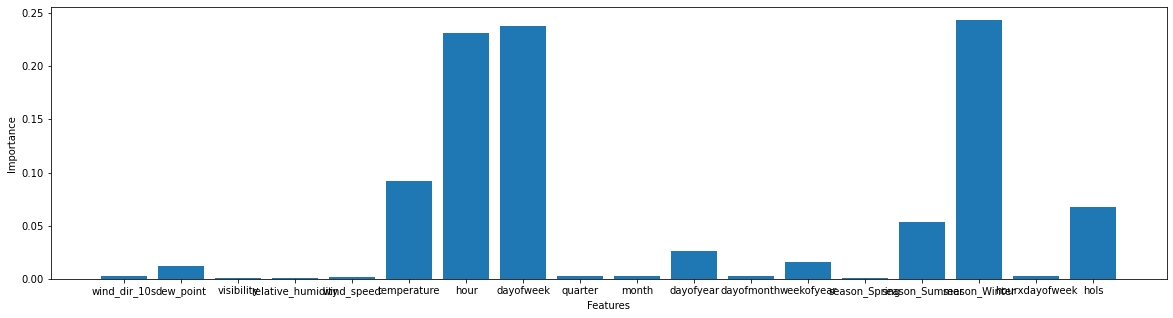

In [67]:
fig = plt.figure(figsize = (20, 5))
plt.bar(X_train.columns, reg3.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [68]:
from sklearn.feature_selection import SelectFromModel

In [69]:
thresholds = np.sort(reg3.feature_importances_)

for thresh in thresholds:
    
    selection = SelectFromModel(reg3, threshold=thresh, prefit=True)
    
    
    select_X_train = selection.transform(X_train)
    
    selection_model = xgb.XGBRegressor(
                        min_child_weight = 40,
                        learning_rate = 0.1,
                        max_depth = 5, n_estimators = 100)
    selection_model.fit(select_X_train, y_train)

    select_X_test = selection.transform(X_test)
    
    predictions = selection_model.predict(select_X_test)
    
    ac = r2_score(y_test, predictions)
    
    print("Thresh=%.3f, n=%d, r2_score: %.2f%%" % (thresh, select_X_train.shape[1], ac*100.0))

Thresh=0.001, n=18, r2_score: 78.38%
Thresh=0.001, n=17, r2_score: 78.26%
Thresh=0.001, n=16, r2_score: 78.34%
Thresh=0.002, n=15, r2_score: 78.31%
Thresh=0.002, n=14, r2_score: 77.84%
Thresh=0.003, n=13, r2_score: 78.03%
Thresh=0.003, n=12, r2_score: 78.03%
Thresh=0.003, n=11, r2_score: 78.03%
Thresh=0.003, n=10, r2_score: 78.23%
Thresh=0.013, n=9, r2_score: 78.11%
Thresh=0.016, n=8, r2_score: 77.71%
Thresh=0.026, n=7, r2_score: 77.86%
Thresh=0.054, n=6, r2_score: 80.44%
Thresh=0.067, n=5, r2_score: 80.24%
Thresh=0.092, n=4, r2_score: 77.02%
Thresh=0.232, n=3, r2_score: 64.88%
Thresh=0.238, n=2, r2_score: 25.22%
Thresh=0.243, n=1, r2_score: 5.23%


In [70]:
#dayofweek, hour, temperature,hols,season_Winter,season_Summer
X_train_f3 = X_train[['hour', 'dayofweek', 'temperature', 'hols', 'season_Winter','season_Summer']]
X_test_f3 = X_test[['hour', 'dayofweek', 'temperature', 'hols', 'season_Winter','season_Summer']]


reg_f3 = xgb.XGBRegressor(#gamma = 400,
                        min_child_weight = 40,
                        learning_rate = 0.1,
                        #max_delta_step = 600,
                        max_depth = 5, n_estimators = 100)
reg_f3.fit(X_train_f3, y_train)

mse_reg_f3 = mean_squared_error(y_test, reg_f3.predict(X_test_f3))
r2_reg_f3 = r2_score(y_test, reg_f3.predict(X_test_f3))
mae_reg_f3 = mean_absolute_error (y_test, reg_f3.predict(X_test_f3))

print(f'MSE Score on Test set: {mse_reg_f3:0.2f}')
print(f'RMSE Score on Test set: {np.sqrt(mse_reg_f3):0.2f}')
print(f'R2 Score on Test set: {r2_reg_f3:0.4f}')
print(f'MAE Score on Test set: {mae_reg_f3:0.2f}')

MSE Score on Test set: 559.97
RMSE Score on Test set: 23.66
R2 Score on Test set: 0.8044
MAE Score on Test set: 17.71


In [71]:
import pickle
file_name = "electricity_model.pkl"
pickle.dump(reg_f3, open(file_name, "wb"))

In [72]:
df_day_predict = df[(df.index >= '2017-10-20 00:00') & (df.index < '2017-10-21 00:0')]

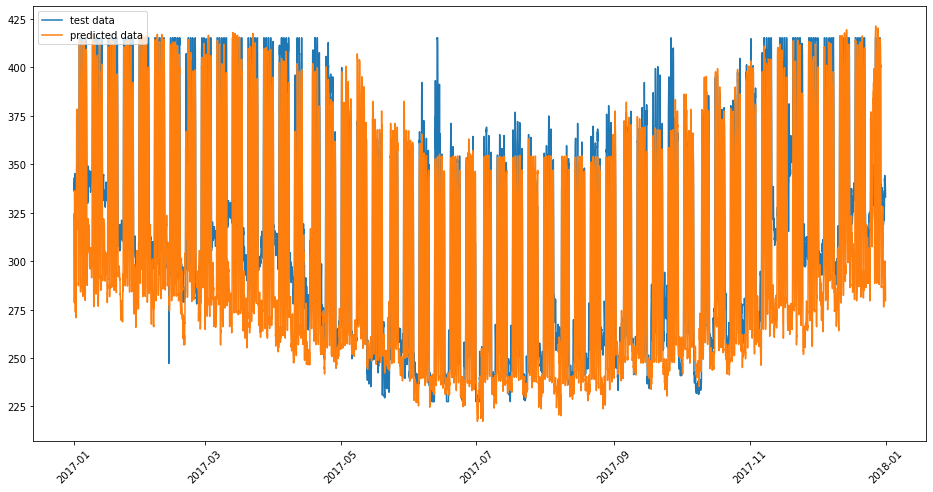

In [73]:
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(y_test.index, y_test, label ='test data')
plt.plot(y_test.index, reg_f3.predict(X_test[['hour', 'dayofweek', 'temperature', 'hols', 'season_Winter','season_Summer']]), label ='predicted data')
plt.legend(loc="upper left")
plt.xticks(rotation=45)
plt.show()

### RandomForestRegressor

In [74]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

rfr_mse = mean_squared_error(y_test, rfr.predict(X_test))
rfr_r2 = r2_score(y_test, rfr.predict(X_test))
rfr_mae = mean_absolute_error (y_test, rfr.predict(X_test))

print(f'MSE Score on Test set: {rfr_mse:0.2f}')
print(f'RMSE Score on Test set: {np.sqrt(rfr_mse):0.2f}')
print(f'R2 Score on Test set: {rfr_r2:0.2f}')
print(f'MAE Score on Test set: {rfr_mae:0.2f}')

MSE Score on Test set: 652.52
RMSE Score on Test set: 25.54
R2 Score on Test set: 0.77
MAE Score on Test set: 19.21


In [75]:
# rfr2 = RandomForestRegressor()

# param_grid = { 
#     'max_depth' : [14,15,16],
#     'max_features' : ['sqrt', 'log2'],
#     'n_estimators' : [100, 200],
#     'min_samples_split' : [7,10,15],
    
# }

# rfr2 = GridSearchCV(estimator=rfr2, param_grid=param_grid)
# rfr2.fit(X_train, y_train)

# rfr2.best_params_

In [76]:
rfr3 = RandomForestRegressor(max_features = 'log2', max_depth = 16, n_estimators = 200, min_samples_split = 7)
rfr3.fit(X_train, y_train)

mse_rfr3 = mean_squared_error(y_test, rfr3.predict(X_test))
r2_rfr3 = r2_score(y_test, rfr3.predict(X_test))
mae_rfr3 = mean_absolute_error (y_test, rfr3.predict(X_test))
rmse_rfr3 = np.sqrt(mse_rfr3)

print(f'MSE Score on Test set: {mse_rfr3:0.2f}')
print(f'RMSE Score on Test set: {rmse_rfr3:0.2f}')
print(f'R2 Score on Test set: {r2_rfr3:0.2f}')
print(f'MAE Score on Test set: {mae_rfr3:0.2f}')

MSE Score on Test set: 598.18
RMSE Score on Test set: 24.46
R2 Score on Test set: 0.79
MAE Score on Test set: 19.37


It is pretty common to use model.feature_importances in sklearn random forest to study about the important features. Important features mean the features that are more closely related with dependent variable and contribute more for variation of the dependent variable. We generally feed as much features as we can to a random forest model and let the algorithm give back the list of features that it found to be most useful for prediction. But carefully choosing right features can make our target predictions more accurate .

In [77]:
col = np.array(X_train.columns)
imp = np.array(rfr3.feature_importances_)

df_imp = pd.DataFrame({'columns': col, 'importance': imp}, columns=['columns', 'importance'])
df_imp.sort_values('importance', ascending = False)

,columns,importance
6,hour,0.361071
7,dayofweek,0.201996
16,hourxdayofweek,0.111309
10,dayofyear,0.052278
5,temperature,0.052124
1,dew_point,0.048388
12,weekofyear,0.034850
9,month,0.022222
3,relative_humidity,0.018189
15,season_Winter,0.015085


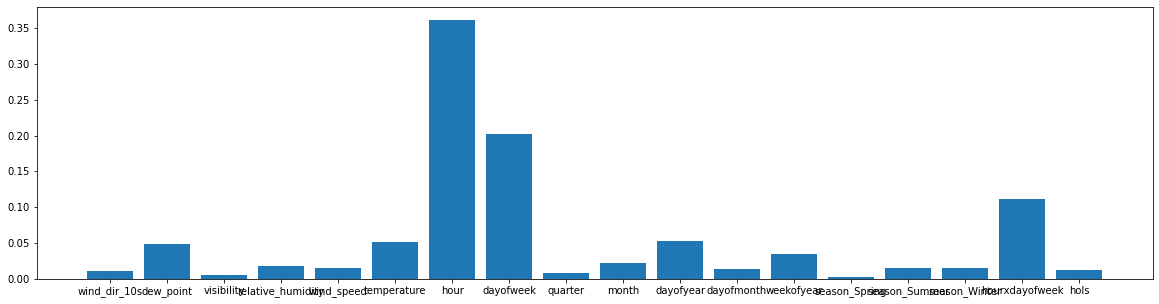

In [78]:
fig = plt.figure(figsize = (20, 5))
plt.bar(X_train.columns, rfr3.feature_importances_)
plt.show()

In [79]:
thresholds = np.sort(rfr3.feature_importances_)

for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(rfr3, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = RandomForestRegressor(max_features = 'log2', max_depth = 16, n_estimators = 200, min_samples_split = 7)
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    predictions = selection_model.predict(select_X_test)
    ac = r2_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, r2_score: %.2f%%" % (thresh, select_X_train.shape[1], ac*100.0))

Thresh=0.002, n=18, r2_score: 78.97%
Thresh=0.005, n=17, r2_score: 78.98%
Thresh=0.008, n=16, r2_score: 79.00%
Thresh=0.011, n=15, r2_score: 78.63%
Thresh=0.013, n=14, r2_score: 79.02%
Thresh=0.014, n=13, r2_score: 77.06%
Thresh=0.015, n=12, r2_score: 77.27%
Thresh=0.015, n=11, r2_score: 77.03%
Thresh=0.015, n=10, r2_score: 76.82%
Thresh=0.018, n=9, r2_score: 76.63%
Thresh=0.022, n=8, r2_score: 76.45%
Thresh=0.035, n=7, r2_score: 76.89%
Thresh=0.048, n=6, r2_score: 76.85%
Thresh=0.052, n=5, r2_score: 76.38%
Thresh=0.052, n=4, r2_score: 75.29%
Thresh=0.111, n=3, r2_score: 52.99%
Thresh=0.202, n=2, r2_score: 52.94%
Thresh=0.361, n=1, r2_score: 22.76%


In [80]:
# #dayofweek, hour, temperature,hols,season_Winter,season_Summer
# X_train_f3 = X_train[[thresholds]]
# X_test_f3 = X_test[['hour', 'dayofweek', 'temperature', 'hols', 'season_Winter','season_Summer']]


# reg_f3 = xgb.XGBRegressor(#gamma = 400,
#                         min_child_weight = 40,
#                         learning_rate = 0.1,
#                         #max_delta_step = 600,
#                         max_depth = 5, n_estimators = 100)
# reg_f3.fit(X_train_f3, y_train)

# mse_reg_f3 = mean_squared_error(y_test, reg_f3.predict(X_test_f3))
# r2_reg_f3 = r2_score(y_test, reg_f3.predict(X_test_f3))
# mae_reg_f3 = mean_absolute_error (y_test, reg_f3.predict(X_test_f3))

# print(f'MSE Score on Test set: {mse_reg_f3:0.2f}')
# print(f'RMSE Score on Test set: {np.sqrt(mse_reg_f3):0.2f}')
# print(f'R2 Score on Test set: {r2_reg_f3:0.4f}')
# print(f'MAE Score on Test set: {mae_reg_f3:0.2f}')

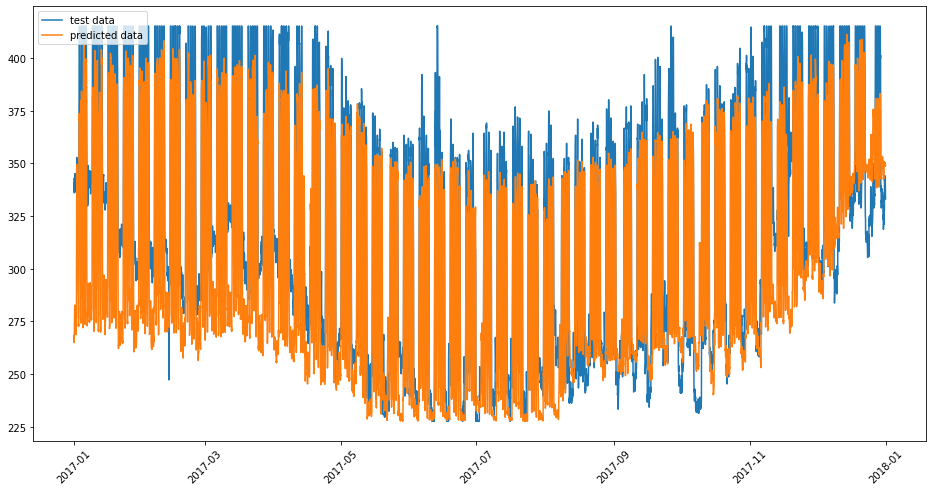

In [81]:
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(y_test.index, y_test, label ='test data')
plt.plot(y_test.index, rfr3.predict(X_test), label ='predicted data')
plt.xticks(rotation=45)
plt.legend(loc="upper left")
plt.show()

### KNN with/without MinMax scaling

In [82]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler

In [83]:
X = df.drop(labels=['electricity'], axis=1)
y = df['electricity']

X_train = X[(X.index >= '2016-01-01 00:00') & (X.index < '2017-01-01 00:00')]
X_test = X[(X.index >= '2017-01-01 00:00') & (X.index < '2018-01-01 00:00')]
y_train = y[(y.index >= '2016-01-01 00:00') & (y.index < '2017-01-01 00:00')]
y_test = y[(y.index >= '2017-01-01 00:00') & (y.index < '2018-01-01 00:00')]

In [84]:
knn = KNeighborsRegressor(n_neighbors=11)
knn.fit(X_train, y_train)

mse = mean_squared_error(y_test, knn.predict(X_test))
r2 = r2_score(y_test, knn.predict(X_test))
mae = mean_absolute_error (y_test, knn.predict(X_test))

print(f'MSE Score on Test set: {mse:0.2f}')
print(f'RMSE Score on Test set: {np.sqrt(mse):0.2f}')
print(f'R2 Score on Test set: {r2:0.2f}')
print(f'MAE Score on Test set: {mae:0.2f}')

MSE Score on Test set: 1889.35
RMSE Score on Test set: 43.47
R2 Score on Test set: 0.34
MAE Score on Test set: 34.59


In [85]:
scaler = 0

In [86]:
df_knn = df.copy(deep=True)

cols_to_norm = ['electricity','temperature', 'visibility', 'wind_dir_10s', 'relative_humidity', 'dew_point', 'wind_speed'
               ,'hourxdayofweek']
scaler1 = MinMaxScaler()

df_knn[cols_to_norm] = scaler1.fit_transform(df_knn[cols_to_norm])

df_knn.sort_index(inplace=True)

X_knn = df_knn.drop(labels=['electricity'], axis=1)
y_knn = df_knn['electricity']


X_train_knn = X_knn[(X_knn.index >= '2016-01-01 00:00') & (X_knn.index < '2017-01-01 00:00')]
X_test_knn = X_knn[(X_knn.index >= '2017-01-01 00:00') & (X_knn.index < '2018-01-01 00:00')]
y_train_knn = y_knn[(y_knn.index >= '2016-01-01 00:00') & (y_knn.index < '2017-01-01 00:00')]
y_test_knn = y_knn[(y_knn.index >= '2017-01-01 00:00') & (y_knn.index < '2018-01-01 00:00')]

In [87]:
knn = KNeighborsRegressor(n_neighbors=11)
knn.fit(X_train_knn, y_train_knn)

mse_knn = mean_squared_error(y_test_knn, knn.predict(X_test_knn))
r2_knn = r2_score(y_test_knn, knn.predict(X_test_knn))
mae_knn = mean_absolute_error (y_test_knn, knn.predict(X_test_knn))

print(f'MSE Score on Test set: {mse_knn:0.2f}')
print(f'RMSE Score on Test set: {np.sqrt(mse_knn):0.2f}')
print(f'R2 Score on Test set: {r2_knn:0.2f}')
print(f'MAE Score on Test set: {mae_knn:0.2f}')

MSE Score on Test set: 0.03
RMSE Score on Test set: 0.16
R2 Score on Test set: 0.68
MAE Score on Test set: 0.12


In [88]:
scaler2 = MinMaxScaler()

df_elec_sc = scaler2.fit_transform(df[['electricity']])

In [90]:
y_test_knn2 = y_test_knn.to_numpy()

In [91]:
y_pred_knn_sc = knn.predict(X_test_knn)
inv_y_pred = scaler2.inverse_transform(y_pred_knn_sc.reshape(-1, 1))
inv_y_test = scaler2.inverse_transform(y_test_knn2.reshape(-1, 1))

In [92]:
mse_knn_resc = mean_squared_error(inv_y_test, inv_y_pred)
r2_knn_resc = r2_score(y_test_knn, knn.predict(X_test_knn))
mae_knn_resc = mean_absolute_error (inv_y_test, inv_y_pred)

print(f'MSE Score on Test set: {mse_knn_resc:0.2f}')
print(f'RMSE Score on Test set: {np.sqrt(mse_knn_resc):0.2f}')
print(f'R2 Score on Test set: {r2_knn_resc:0.2f}')
print(f'MAE Score on Test set: {mae_knn_resc:0.2f}')

MSE Score on Test set: 919.99
RMSE Score on Test set: 30.33
R2 Score on Test set: 0.68
MAE Score on Test set: 22.54


### Linear regression

In [94]:
from sklearn import linear_model

In [100]:
lin = linear_model.LinearRegression()
model = lin.fit(X_train, y_train)

mse_lin = mean_squared_error(y_test, lin.predict(X_test))
r2_lin = r2_score(y_test, lin.predict(X_test))
mae_lin = mean_absolute_error (y_test, lin.predict(X_test))

print(f'MSE Score on Test set: {mse_lin:0.2f}')
print(f'RMSE Score on Test set: {np.sqrt(mse_lin):0.2f}')
print(f'R2 Score on Test set: {r2_lin:0.2f}')
print(f'MAE Score on Test set: {mae_lin:0.2f}')

MSE Score on Test set: 1994.48
RMSE Score on Test set: 44.66
R2 Score on Test set: 0.30
MAE Score on Test set: 35.28


In [101]:
ev_df = pd.DataFrame({'model':['Linear Regression', 'XGBoost Regression', 'Random Forest Regression', 'KNN Regression',
                               'XGBR after HP/FS',
                               'Random Forest Regression after HP/FS',  'KNN Regression after scaling'], 
                        'R-squared score':[ r2_lin, r2_reg, rfr_r2, r2, r2_reg_f3, r2_rfr3, r2_knn
                                    ]})

ev_df['MSE'] = [mse_lin, mse_reg, rfr_mse, mse, mse_reg_f3, mse_rfr3, mse_knn_resc]

ev_df['RMSE'] = [np.sqrt(mse_lin), np.sqrt(mse_reg), np.sqrt(rfr_mse), np.sqrt(mse), np.sqrt(mse_reg_f3), 
                 np.sqrt(mse_rfr3), np.sqrt(mse_knn_resc)]

ev_df['MAE'] = [mae_lin, mae_reg, rfr_mae, mae, mae_reg_f3, mae_rfr3, mae_knn_resc]

ev_df

,model,R-squared score,MSE,RMSE,MAE
0,Linear Regression,0.303326,1994.475391,44.659550,35.278095
1,XGBoost Regression,0.775076,643.925448,25.375686,18.938534
2,Random Forest Regression,0.772073,652.522919,25.544528,19.208147
3,KNN Regression,0.340048,1889.347101,43.466621,34.587749
4,XGBR after HP/FS,0.804402,559.968374,23.663651,17.708565
5,Random Forest Regression after HP/FS,0.791056,598.176782,24.457653,19.366802
6,KNN Regression after scaling,0.678645,919.990880,30.331351,22.539270


### Neural network

In [102]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, Dropout
import tensorflow as tf
from sklearn import metrics
import torch

In [103]:
import torch.nn as nn
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [105]:
def create_dataset(df):

    sequences = df.astype(np.float32).to_numpy().tolist()

    dataset = [torch.tensor(s).unsqueeze(1).float() for s in sequences]

    n_seq, seq_len, n_features = torch.stack(dataset).shape

    return dataset, seq_len, n_features

In [106]:
df_lstm, seq_len, n_features = create_dataset(df)

In [107]:
df_lstm

[tensor([[ 2.5536e+02],
         [ 2.6000e+01],
         [-3.8000e+00],
         [ 2.4100e+04],
         [ 9.1000e+01],
         [ 1.0000e+01],
         [-2.5000e+00],
         [ 0.0000e+00],
         [ 4.0000e+00],
         [ 1.0000e+00],
         [ 1.0000e+00],
         [ 1.0000e+00],
         [ 1.0000e+00],
         [ 5.3000e+01],
         [ 0.0000e+00],
         [ 0.0000e+00],
         [ 1.0000e+00],
         [ 0.0000e+00],
         [ 1.0000e+00]]),
 tensor([[ 2.5680e+02],
         [ 2.5000e+01],
         [-4.1000e+00],
         [ 6.4000e+03],
         [ 9.0000e+01],
         [ 1.0000e+01],
         [-2.7000e+00],
         [ 1.0000e+00],
         [ 4.0000e+00],
         [ 1.0000e+00],
         [ 1.0000e+00],
         [ 1.0000e+00],
         [ 1.0000e+00],
         [ 5.3000e+01],
         [ 0.0000e+00],
         [ 0.0000e+00],
         [ 1.0000e+00],
         [ 4.0000e+00],
         [ 1.0000e+00]]),
 tensor([[ 2.5968e+02],
         [ 2.5000e+01],
         [-4.3000e+00],
         [ 4

In [108]:
seq_len

19

In [109]:
n_features

1

In [110]:
import numpy as np
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Step 1: Prepare your data
data = np.array(df)  # Example data
sequence_length = 4  # Length of input sequences
output_length = 1  # Length of output sequences

# Step 2: Create input sequences and corresponding output
sequences = []
targets = []
for i in range(len(data) - sequence_length - output_length + 1):
    sequences.append(data[i:i + sequence_length])
    targets.append(data[i + sequence_length:i + sequence_length + output_length][0])
    

# Step 3: Convert sequences and targets to numpy arrays
sequences = np.array(sequences)
targets = np.array(targets)

# # Step 4: Split data into training and testing sets
# split_ratio = 0.8  # Ratio of training set to whole data
# split_index = int(split_ratio * len(sequences))

# train_sequences = sequences[:split_index]
# train_targets = targets[:split_index]
# test_sequences = sequences[split_index:]
# test_targets = targets[split_index:]

# # Step 5: Create a LSTM model
# model = Sequential()
# model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
# model.add(Dense(output_length))

# # Step 6: Compile the model
# model.compile(optimizer='adam', loss='mse')

# # Step 7: Train the model
# model.fit(train_sequences, train_targets, epochs=100, verbose=2)

# # Step 8: Evaluate the model
# loss = model.evaluate(test_sequences, test_targets, verbose=0)
# print('Test loss:', loss)

# # Step 9: Make predictions using the trained model
# predictions = model.predict(test_sequences)
# print('Predictions:', predictions)

In [111]:
df.head()

,electricity,wind_dir_10s,dew_point,visibility,relative_humidity,wind_speed,temperature,hour,dayofweek,quarter,month,dayofyear,dayofmonth,weekofyear,season_Spring,season_Summer,season_Winter,hourxdayofweek,hols
timestamp,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,255.3613,26.0,-3.8,24100.0,91.0,10,-2.5,0,4,1,1,1,1,53,0,0,1,0,1
2016-01-01 01:00:00,256.8002,25.0,-4.1,6400.0,90.0,10,-2.7,1,4,1,1,1,1,53,0,0,1,4,1
2016-01-01 02:00:00,259.6808,25.0,-4.3,4800.0,92.0,6,-3.2,2,4,1,1,1,1,53,0,0,1,8,1
2016-01-01 03:00:00,261.1197,26.0,-4.2,4800.0,94.0,5,-3.4,3,4,1,1,1,1,53,0,0,1,12,1
2016-01-01 04:00:00,268.3197,22.0,-4.5,6400.0,95.0,6,-3.8,4,4,1,1,1,1,53,0,0,1,16,1


In [112]:
targets2 = pd.DataFrame(targets)
y = targets2.iloc[:,0]

In [113]:
sequences.shape

(17540, 4, 19)

In [116]:
# Step 4: Split data into training and testing sets
split_ratio = 0.8  # Ratio of training set to whole data
split_index = int(split_ratio * len(sequences))

train_sequences = sequences[:split_index]
train_targets = y[:split_index]
test_sequences = sequences[split_index:]
test_targets = y[split_index:]

# Step 5: Create a LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 19)))
model.add(Dense(output_length))

# Step 6: Compile the model
model.compile(optimizer='adam', loss='mse')

# Step 7: Train the model
model.fit(train_sequences, train_targets, epochs=40, verbose=2)

# Step 8: Evaluate the model
loss = model.evaluate(test_sequences, test_targets, verbose=0)
print('Test loss:', loss)

# Step 9: Make predictions using the trained model
predictions = model.predict(test_sequences)
print('Predictions:', predictions)

Epoch 1/40
439/439 - 3s - loss: 26887.4395 - 3s/epoch - 7ms/step
Epoch 2/40
439/439 - 1s - loss: 4514.6909 - 1s/epoch - 3ms/step
Epoch 3/40
439/439 - 1s - loss: 1013.1815 - 1s/epoch - 3ms/step
Epoch 4/40
439/439 - 1s - loss: 839.7088 - 1s/epoch - 3ms/step
Epoch 5/40
439/439 - 1s - loss: 696.3335 - 1s/epoch - 3ms/step
Epoch 6/40
439/439 - 1s - loss: 615.6873 - 1s/epoch - 3ms/step
Epoch 7/40
439/439 - 1s - loss: 512.1520 - 1s/epoch - 3ms/step
Epoch 8/40
439/439 - 1s - loss: 463.1705 - 1s/epoch - 3ms/step
Epoch 9/40
439/439 - 2s - loss: 389.5538 - 2s/epoch - 4ms/step
Epoch 10/40
439/439 - 2s - loss: 325.2394 - 2s/epoch - 4ms/step
Epoch 11/40
439/439 - 1s - loss: 283.3160 - 1s/epoch - 3ms/step
Epoch 12/40
439/439 - 1s - loss: 250.0359 - 1s/epoch - 3ms/step
Epoch 13/40
439/439 - 1s - loss: 217.2827 - 1s/epoch - 3ms/step
Epoch 14/40
439/439 - 1s - loss: 193.5348 - 1s/epoch - 3ms/step
Epoch 15/40
439/439 - 1s - loss: 184.4984 - 1s/epoch - 3ms/step
Epoch 16/40
439/439 - 1s - loss: 165.2475 - 1

In [117]:
y_pred = model.predict(test_sequences)

110/110 [==============================] - 0s 2ms/step


In [118]:
test_targets1 = test_targets.reset_index()

In [119]:
mse_lstm = mean_squared_error(test_targets1[0], y_pred)
r2_lstm = r2_score(test_targets1[0], y_pred)
mae_lstm = mean_absolute_error (test_targets1[0], y_pred)

print(f'MSE Score on Test set: {mse_lstm:0.2f}')
print(f'RMSE Score on Test set: {np.sqrt(mse_lstm):0.2f}')
print(f'R2 Score on Test set: {r2_lstm:0.2f}')
print(f'MAE Score on Test set: {mae_lstm:0.2f}')

MSE Score on Test set: 79.70
RMSE Score on Test set: 8.93
R2 Score on Test set: 0.97
MAE Score on Test set: 6.49


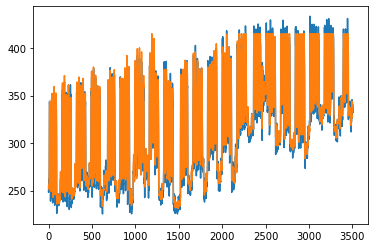

In [121]:
plt.plot(y_pred)
plt.plot(test_targets1[0])